Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.3149 - val_loss: 0.1905
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1832 - val_loss: 0.1672
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1646 - val_loss: 0.1569
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1558 - val_loss: 0.1504
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1510 - val_loss: 0.1467
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1468 - val_loss: 0.1431
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1440 - val_loss: 0.1408
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1415 - val_loss: 0.1385
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1398 - val_loss: 0.1358
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1375 - val_loss: 0.1346
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1365 - val_loss: 0.1331
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

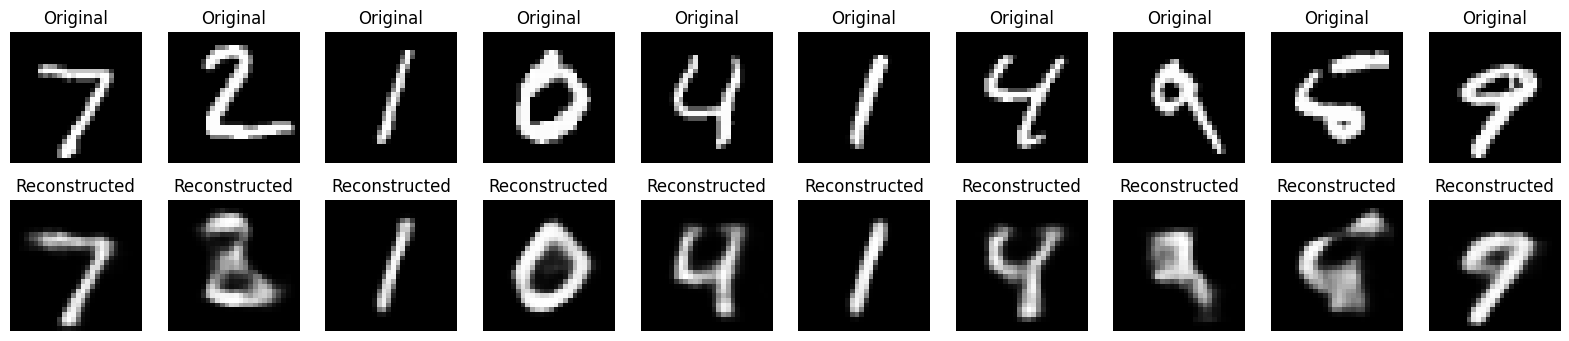

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import mnist

#Load and Preprocess the MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#Define a Deeper Autoencoder Model
input_img = keras.Input(shape=(28, 28, 1))

#Encoder (4 blocks)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)      # 28x28x32
x = layers.MaxPooling2D((2, 2), padding='same')(x)                                # 14x14x32
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)              # 14x14x16
x = layers.MaxPooling2D((2, 2), padding='same')(x)                                # 7x7x16
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)               # 7x7x8
x = layers.MaxPooling2D((2, 2), padding='same')(x)                                # 4x4x8
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)               # 4x4x4
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)                          # 2x2x4

#Decoder (mirroring the encoder)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)         # 2x2x4
x = layers.UpSampling2D((2, 2))(x)                                                # 4x4x4
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)               # 4x4x8
x = layers.UpSampling2D((2, 2))(x)                                                # 8x8x8
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)              # 8x8x16
x = layers.UpSampling2D((2, 2))(x)                                                # 16x16x16
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)              # 16x16x32
x = layers.UpSampling2D((2, 2))(x)                                                # 32x32x32 - crop to 28x28
x = layers.Cropping2D(((2, 2), (2, 2)))(x)                                        # 28x28x32
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)      # 28x28x1

#Build and Compile the Model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Train the Model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

#Visualize the Output
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    #Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

